1. Serie temporali (line plot)
    - Andamento dei nuovi casi HIV nel tempo per un paese (es. Italia, o confrontare 2–3 paesi chiave).
    -  Oppure mediana per regione WHO.

2. Mappa del mondo (choropleth)
    - Mostrare per un anno specifico (es. 2022) la distribuzione dei nuovi casi HIV assoluti.
    - Meglio se normalizzi per popolazione (se riesci ad aggiungere un dataset di popolazione).

3. Heatmap (anno × regione)
    - Righe = regioni WHO, colonne = anni, valori = nuovi casi HIV (o log10 se ci sono paesi molto grandi).
    - Mostra bene la distribuzione temporale e geografica.

4. Intervalli di confidenza
    - Per 1 paese, un line plot con value come linea principale e bande di incertezza (low–high).

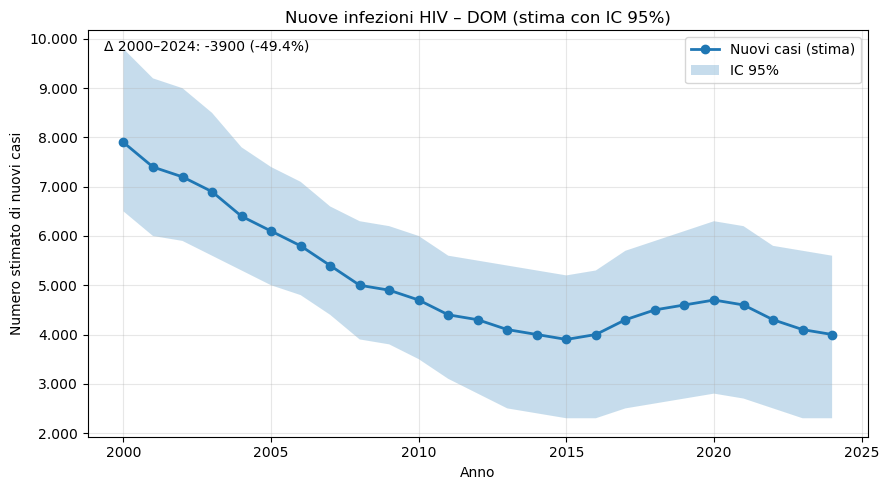

In [ ]:
# Grafico: Nuove infezioni HIV – tutti i paesi UE27 (senza somma), Italia evidenziata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.read_csv("HIV_0000000026.csv")  # <-- metti il tuo percorso

# ISO3 dei paesi UE27
EU27 = [
    "AUT","BEL","BGR","HRV","CYP","CZE","DNK","EST","FIN","FRA","DEU","GRC","HUN",
    "IRL","ITA","LVA","LTU","LUX","MLT","NLD","POL","PRT","ROU","SVK","SVN","ESP","SWE"
]

# Filtra UE, ordina e rimuovi NaN sui valori
df_eu = (df[df["iso3"].isin(EU27)]
         .dropna(subset=["value"])
         .sort_values(["iso3","year"]))

fig, ax = plt.subplots(figsize=(11,6))

# Traccia tutte le linee dei paesi (sottili, trasparenti per non affollare)
for iso in sorted(df_eu["iso3"].unique()):
    dfi = df_eu[df_eu["iso3"] == iso]
    ax.plot(dfi["year"], dfi["value"], linewidth=1.2, alpha=0.35)

# Evidenzia l'Italia
df_ita = df_eu[df_eu["iso3"] == "ITA"].sort_values("year")
if not df_ita.empty:
    ax.plot(df_ita["year"], df_ita["value"], linewidth=2.4, label="Italia (ITA)")
    # Annotazione variazione Italia (opzionale)
    if len(df_ita) >= 2:
        delta = df_ita["value"].iloc[-1] - df_ita["value"].iloc[0]
        pct = 100 * delta / df_ita["value"].iloc[0]
        ax.annotate(f"ITA Δ {df_ita['year'].iloc[0]}–{df_ita['year'].iloc[-1]}: {delta:+,.0f} ({pct:+.1f}%)".replace(",", "."),
                    xy=(0.02, 0.95), xycoords="axes fraction", fontsize=10)

# Formattazione assi e titolo
ax.set_title("Nuove infezioni HIV – Paesi UE27 (stime OMS)")
ax.set_xlabel("Anno")
ax.set_ylabel("Numero stimato di nuovi casi")
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", ".")))
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()
plt.show()
